<a href="https://colab.research.google.com/github/shruthad/Medical-Image-segmentation/blob/main/Medical_image_segmentation(DaNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy

In [ ]:

X_train= []
Y_train=[]

X_test=[]
Y_test=[]
for k in range(84):
  
  
    X_train.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/train_{k+1}.bmp'))
    Y_train.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/train_{k+1}_anno.bmp'))
for i in range(21,59):
  
    X_train.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{i+1}.bmp'))
    Y_train.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{i+1}_anno.bmp'))

In [ ]:

for k in range(20):
  
    X_test.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{k+1}.bmp'))
    Y_test.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{k+1}_anno.bmp'))

In [ ]:
len(X_test)

20

In [ ]:
for i in range(20):
  print(numpy.unique(Y_test[i]))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
[0 1 2 3 4]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
[0 1 2 3 4 5]


In [ ]:
X_train[0].shape

(522, 775, 3)

In [ ]:
import cv2
im_size=512
in_size=768

inp=[]

for img in X_train:
   new_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
   b,g,r = cv2.split(new_image)
   #gray = 0.2125*r + 0.7154*g + 0.0721*b
   smoothed = cv2.GaussianBlur(new_image, (9, 9), cv2.BORDER_DEFAULT) 
   unsharped = cv2.addWeighted(new_image, 1.5, smoothed, -0.5, 0)
   
   
   image = cv2.resize(unsharped, (in_size,im_size))
   inp.append(image)
   

In [ ]:
import cv2
im_size=512
in_size=768

out=[]

for img in Y_train:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   #imgUMat = np.float32(bw)
   #backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   out.append(new_image)

In [ ]:
for i in range(122):
  for j in out[i]:
     for n,k in enumerate(j):
       if k>0:
         j[n]=255;
       else:
         j[n]=0;

In [ ]:
out[1].shape

(512, 768)

In [ ]:
import numpy as np
Out=[]
for img in out:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   imgUMat = np.float32(img)
   backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   #new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   Out.append(backtorgb)

In [ ]:
Out[1].shape

(512, 768, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


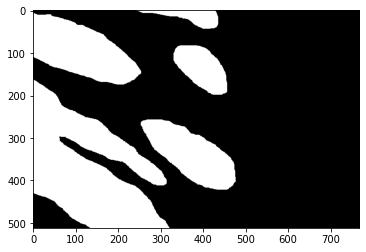

In [ ]:
plt.imshow(Out[1])

In [ ]:
len(Out)

122

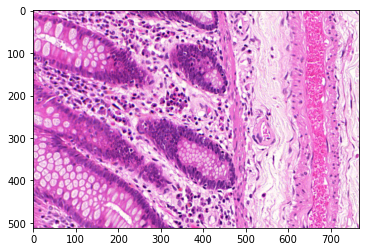

In [ ]:
plt.imshow(inp[1])

In [ ]:
import cv2
im_size=512
in_size=768

testin=[]

for img in X_test:
   new_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   #b,g,r = cv2.split(new_image)
   smoothed = cv2.GaussianBlur(new_image, (9, 9), cv2.BORDER_DEFAULT) 
   unsharped = cv2.addWeighted(new_image, 1.5, smoothed, -0.5, 0)
   
   image = cv2.resize(unsharped, (in_size,im_size))
   testin.append(image)

In [ ]:
import cv2
im_size=512
in_size=768

testout=[]

for img in Y_test:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   #imgUMat = np.float32(bw)
   #backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   testout.append(new_image)

In [ ]:
for i in range(20):
  for j in testout[i]:
     for n,k in enumerate(j):
       if k>0:
         j[n]=255;
       else:
         j[n]=0;

In [ ]:
import numpy as np
testOut=[]
for img in testout:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   imgUMat = np.float32(img)
   backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   #new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   testOut.append(backtorgb)

In [ ]:
#dont run
import cv2
im_size=512
in_size=768

testout=[]

for img in Y_test:
   retuval,BW=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   ImgUMat = np.float32(BW)
   Backtorgb=cv2.cvtColor(ImgUMat,cv2.COLOR_GRAY2RGB)
   
   new_image = cv2.resize(Backtorgb,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   
   testout.append(new_image)

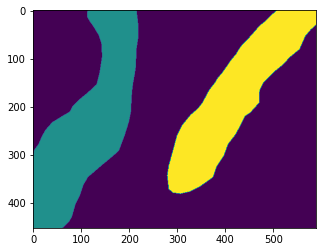

In [ ]:
plt.imshow(Y_test[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


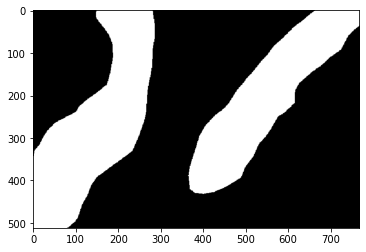

In [ ]:
plt.imshow(testOut[1])

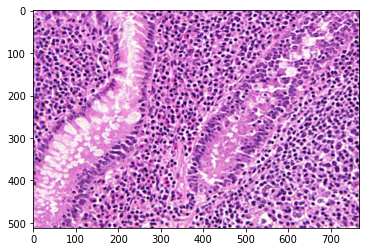

In [ ]:
plt.imshow(testin[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


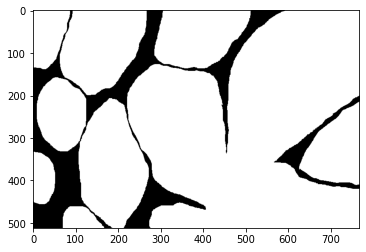

In [ ]:
plt.imshow(testOut[0])

In [ ]:
Y_test[0]

array([[1, 1, 1, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 7, 7],
       ...,
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7]], dtype=uint8)

In [ ]:
testOut[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [ ]:
imagepatches=[]
for i,imag in enumerate(inp):
  
  ti_1=imag[0:256,0:256]
  imagepatches.append(ti_1)

  ti_2=imag[0:256,256:512]
  imagepatches.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  imagepatches.append(ti_3)

  ti_4=imag[256:512,0:256]
  imagepatches.append(ti_4)

  ti_5=imag[256:512,256:512]
  imagepatches.append(ti_5)

  ti_6=imag[256:512,512:768]
  imagepatches.append(ti_6)

In [ ]:
maskpatches=[]
for j,msk in enumerate(Out):
  
  tj_1=msk[0:256,0:256]
  maskpatches.append(tj_1)

  tj_2=msk[0:256,256:512]
  maskpatches.append(tj_2)
  
  tj_3=msk[0:256,512:768]
  maskpatches.append(tj_3)

  tj_4=msk[256:512,0:256]
  maskpatches.append(tj_4)

  tj_5=msk[256:512,256:512]
  maskpatches.append(tj_5)

  tj_6=msk[256:512,512:768]
  maskpatches.append(tj_6)

In [ ]:
len(imagepatches)

732

In [ ]:
import numpy
x_train =numpy.array(imagepatches)
y_train=numpy.array(maskpatches)

In [ ]:
def iou(y_true, y_pred, smooth = 100):
      intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
      sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
      jac = (intersection + smooth) / (sum_ - intersection + smooth)
      return jac


In [ ]:
 def dice_coef(y_true, y_pred, smooth = 100):
      y_true_f = K.flatten(y_true)
      y_pred_f = K.flatten(y_pred)
      intersection = K.sum(y_true_f * y_pred_f)
      return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [ ]:
def recall_m(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
      recall = true_positives / (possible_positives + K.epsilon())
      return recall

def precision_m(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
      precision = true_positives / (predicted_positives + K.epsilon())
      return precision

def f1_m(y_true, y_pred):
      precision = precision_m(y_true, y_pred)
      recall = recall_m(y_true, y_pred)
      return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
BatchSize = 4
NumChannels = 3
ImgHeight = 256
ImgWidth = 256
NumClass = 2

# training params
#GPUs = '0, 1, 2, 3'
#os.environ["CUDA_VISIBLE_DEVICES"] = GPUs
Optimizer = 'Adam'  # SGD(lr=0.01, momentum=0.9, nesterov=True)
Loss = 'binary_crossentropy'
Metrics = ['accuracy', iou]
NumEpochs = 50
Patience = 10

# data params
#TrainImageDir = '/data/dh_zhu/cong/AerialImageDataset/train/images/'
#ValImageDir = '/data/dh_zhu/cong/AerialImageDataset/val/images/'

# visualization params
metric_list = ['iou']

In [ ]:
from keras.layers import Activation, Conv2D
import keras.backend as K
import tensorflow as tf
from keras.layers import Layer
from sklearn.model_selection import KFold


class PAM(Layer):
    def __init__(self,
                 gamma_initializer=tf.zeros_initializer(),
                 gamma_regularizer=None,
                 gamma_constraint=None,
                 **kwargs):
        super(PAM, self).__init__(**kwargs)
        self.gamma_initializer = gamma_initializer
        self.gamma_regularizer = gamma_regularizer
        self.gamma_constraint = gamma_constraint

    def build(self, input_shape):
        self.gamma = self.add_weight(shape=(1, ),
                                     initializer=self.gamma_initializer,
                                     name='gamma',
                                     regularizer=self.gamma_regularizer,
                                     constraint=self.gamma_constraint)

        self.built = True

    def compute_output_shape(self, input_shape):
        return input_shape

    def call(self, input):
        input_shape = input.get_shape().as_list()
        _, h, w, filters = input_shape

        b = Conv2D(filters // 8, 1, use_bias=False, kernel_initializer='he_normal')(input)
        c = Conv2D(filters // 8, 1, use_bias=False, kernel_initializer='he_normal')(input)
        d = Conv2D(filters, 1, use_bias=False, kernel_initializer='he_normal')(input)

        vec_b = K.reshape(b, (-1, h * w, filters // 8))
        vec_cT = tf.transpose(K.reshape(c, (-1, h * w, filters // 8)), (0, 2, 1))
        bcT = K.batch_dot(vec_b, vec_cT)
        softmax_bcT = Activation('softmax')(bcT)
        vec_d = K.reshape(d, (-1, h * w, filters))
        bcTd = K.batch_dot(softmax_bcT, vec_d)
        bcTd = K.reshape(bcTd, (-1, h, w, filters))

        out = self.gamma*bcTd + input
        return out


class CAM(Layer):
    def __init__(self,
                 gamma_initializer=tf.zeros_initializer(),
                 gamma_regularizer=None,
                 gamma_constraint=None,
                 **kwargs):
        super(CAM, self).__init__(**kwargs)
        self.gamma_initializer = gamma_initializer
        self.gamma_regularizer = gamma_regularizer
        self.gamma_constraint = gamma_constraint

    def build(self, input_shape):
        self.gamma = self.add_weight(shape=(1, ),
                                     initializer=self.gamma_initializer,
                                     name='gamma',
                                     regularizer=self.gamma_regularizer,
                                     constraint=self.gamma_constraint)

        self.built = True

    def compute_output_shape(self, input_shape):
        return input_shape

    def call(self, input):
        input_shape = input.get_shape().as_list()
        _, h, w, filters = input_shape

        vec_a = K.reshape(input, (-1, h * w, filters))
        vec_aT = tf.transpose(vec_a, (0, 2, 1))
        aTa = K.batch_dot(vec_aT, vec_a)
        softmax_aTa = Activation('softmax')(aTa)
        aaTa = K.batch_dot(vec_a, softmax_aTa)
        aaTa = K.reshape(aaTa, (-1, h, w, filters))

        out = self.gamma*aaTa + input
        return out

In [ ]:
from keras.models import Model
from keras.layers import Input, Activation, Conv2D, Dropout
from keras.layers import MaxPooling2D, BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers import add
#from layers.attention import PAM, CAM
from keras.optimizers import Adam


def conv3x3(x, out_filters, strides=(1, 1)):
    x = Conv2D(out_filters, 3, padding='same', strides=strides, use_bias=False, kernel_initializer='he_normal')(x)
    return x


def Conv2d_BN(x, nb_filter, kernel_size, strides=(1, 1), padding='same', use_activation=True):
    x = Conv2D(nb_filter, kernel_size, padding=padding, strides=strides, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    if use_activation:
        x = Activation('relu')(x)
        return x
    else:
        return x


def basic_Block(input, out_filters, strides=(1, 1), with_conv_shortcut=False):
    x = conv3x3(input, out_filters, strides)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = conv3x3(x, out_filters)
    x = BatchNormalization(axis=3)(x)

    if with_conv_shortcut:
        residual = Conv2D(out_filters, 1, strides=strides, use_bias=False, kernel_initializer='he_normal')(input)
        residual = BatchNormalization(axis=3)(residual)
        x = add([x, residual])
    else:
        x = add([x, input])

    x = Activation('relu')(x)
    return x


def bottleneck_Block(input, out_filters, strides=(1, 1), dilation=(1, 1), with_conv_shortcut=False):
    expansion = 4
    de_filters = int(out_filters / expansion)

    x = Conv2D(de_filters, 1, use_bias=False, kernel_initializer='he_normal')(input)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(de_filters, 3, strides=strides, padding='same',
               dilation_rate=dilation, use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)

    x = Conv2D(out_filters, 1, use_bias=False, kernel_initializer='he_normal')(x)
    x = BatchNormalization(axis=3)(x)

    if with_conv_shortcut:
        residual = Conv2D(out_filters, 1, strides=strides, use_bias=False, kernel_initializer='he_normal')(input)
        residual = BatchNormalization(axis=3)(residual)
        x = add([x, residual])
    else:
        x = add([x, input])

    x = Activation('relu')(x)
    return x


def danet_resnet101(height, width, channel, classes):
    input = Input(shape=(height, width, channel))

    conv1_1 = Conv2D(64, 7, strides=(2, 2), padding='same', use_bias=False, kernel_initializer='he_normal')(input)
    conv1_1 = BatchNormalization(axis=3)(conv1_1)
    conv1_1 = Activation('relu')(conv1_1)
    conv1_2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1_1)

    # conv2_x  1/4
    conv2_1 = bottleneck_Block(conv1_2, 256, strides=(1, 1), with_conv_shortcut=True)
    conv2_2 = bottleneck_Block(conv2_1, 256)
    conv2_3 = bottleneck_Block(conv2_2, 256)

    # conv3_x  1/8
    conv3_1 = bottleneck_Block(conv2_3, 512, strides=(2, 2), with_conv_shortcut=True)
    conv3_2 = bottleneck_Block(conv3_1, 512)
    conv3_3 = bottleneck_Block(conv3_2, 512)
    conv3_4 = bottleneck_Block(conv3_3, 512)

    # conv4_x  1/16
    conv4_1 = bottleneck_Block(conv3_4, 1024, strides=(1, 1), dilation=(2, 2), with_conv_shortcut=True)
    conv4_2 = bottleneck_Block(conv4_1, 1024, dilation=(2, 2))
    conv4_3 = bottleneck_Block(conv4_2, 1024, dilation=(2, 2))
    conv4_4 = bottleneck_Block(conv4_3, 1024, dilation=(2, 2))
    conv4_5 = bottleneck_Block(conv4_4, 1024, dilation=(2, 2))
    conv4_6 = bottleneck_Block(conv4_5, 1024, dilation=(2, 2))
    conv4_7 = bottleneck_Block(conv4_6, 1024, dilation=(2, 2))
    conv4_8 = bottleneck_Block(conv4_7, 1024, dilation=(2, 2))
    conv4_9 = bottleneck_Block(conv4_8, 1024, dilation=(2, 2))
    conv4_10 = bottleneck_Block(conv4_9, 1024, dilation=(2, 2))
    conv4_11 = bottleneck_Block(conv4_10, 1024, dilation=(2, 2))
    conv4_12 = bottleneck_Block(conv4_11, 1024, dilation=(2, 2))
    conv4_13 = bottleneck_Block(conv4_12, 1024, dilation=(2, 2))
    conv4_14 = bottleneck_Block(conv4_13, 1024, dilation=(2, 2))
    conv4_15 = bottleneck_Block(conv4_14, 1024, dilation=(2, 2))
    conv4_16 = bottleneck_Block(conv4_15, 1024, dilation=(2, 2))
    conv4_17 = bottleneck_Block(conv4_16, 1024, dilation=(2, 2))
    conv4_18 = bottleneck_Block(conv4_17, 1024, dilation=(2, 2))
    conv4_19 = bottleneck_Block(conv4_18, 1024, dilation=(2, 2))
    conv4_20 = bottleneck_Block(conv4_19, 1024, dilation=(2, 2))
    conv4_21 = bottleneck_Block(conv4_20, 1024, dilation=(2, 2))
    conv4_22 = bottleneck_Block(conv4_21, 1024, dilation=(2, 2))
    conv4_23 = bottleneck_Block(conv4_22, 1024, dilation=(2, 2))

    # conv5_x  1/32
    conv5_1 = bottleneck_Block(conv4_23, 2048, strides=(1, 1), dilation=(4, 4), with_conv_shortcut=True)
    conv5_2 = bottleneck_Block(conv5_1, 2048, dilation=(4, 4))
    conv5_3 = bottleneck_Block(conv5_2, 2048, dilation=(4, 4))

    # ATTENTION
    reduce_conv5_3 = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(conv5_3)
    reduce_conv5_3 = BatchNormalization(axis=3)(reduce_conv5_3)
    reduce_conv5_3 = Activation('relu')(reduce_conv5_3)

    pam = PAM()(reduce_conv5_3)
    pam = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(pam)
    pam = BatchNormalization(axis=3)(pam)
    pam = Activation('relu')(pam)
    pam = Dropout(0.5)(pam)
    pam = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(pam)

    cam = CAM()(reduce_conv5_3)
    cam = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(cam)
    cam = BatchNormalization(axis=3)(cam)
    cam = Activation('relu')(cam)
    cam = Dropout(0.5)(cam)
    cam = Conv2D(512, 3, padding='same', use_bias=False, kernel_initializer='he_normal')(cam)

    feature_sum = add([pam, cam])
    feature_sum = Dropout(0.5)(feature_sum)
    feature_sum = Conv2d_BN(feature_sum, 512, 1)
    merge7 = concatenate([conv3_4, feature_sum], axis=3)
    conv7 = Conv2d_BN(merge7, 512, 3)
    conv7 = Conv2d_BN(conv7, 512, 3)

    up8 = Conv2d_BN(UpSampling2D(size=(2, 2))(conv7), 256, 2)
    merge8 = concatenate([conv2_3, up8], axis=3)
    conv8 = Conv2d_BN(merge8, 256, 3)
    conv8 = Conv2d_BN(conv8, 256, 3)

    up9 = Conv2d_BN(UpSampling2D(size=(2, 2))(conv8), 64, 2)
    merge9 = concatenate([conv1_1, up9], axis=3)
    conv9 = Conv2d_BN(merge9, 64, 3)
    conv9 = Conv2d_BN(conv9, 64, 3)

    up10 = Conv2d_BN(UpSampling2D(size=(2, 2))(conv9), 64, 2)
    conv10 = Conv2d_BN(up10, 64, 3)
    conv10 = Conv2d_BN(conv10, 64, 3)

    conv11 = Conv2d_BN(conv10, classes, 1, use_activation=None)
    activation = Activation('sigmoid', name='Classification')(conv11)

    model = Model(inputs=input, outputs=activation)
    return model


In [ ]:
model = danet_resnet101(ImgHeight, ImgWidth, NumChannels, NumClass)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_126 (Conv2D)             (None, 128, 128, 64) 9408        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 128, 128, 64) 256         conv2d_126[0][0]                 
__________________________________________________________________________________________________
activation_118 (Activation)     (None, 128, 128, 64) 0           batch_normalization_121[0][0]    
____________________________________________________________________________________________

In [ ]:
 model.compile(optimizer = Adam(lr = 0.001), loss ='binary_crossentropy', metrics = ['accuracy',iou,precision_m, recall_m,f1_m,dice_coef])

In [ ]:


color_dict = {0: (0., 0., 0.),          
              1: (255., 255., 255.)}         


def rgb_to_onehot(rgb_arr, color_dict):
    
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

def onehot_to_rgb(onehot, color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in color_dict.keys():
        output[single_layer==k] = color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def conv_to_onehot():
    trainy_hot = []
    for i in range(y_train.shape[0]):
        hot_img = rgb_to_onehot(y_train[i], color_dict)
        trainy_hot.append(hot_img)
    trainy_hot = np.asarray(trainy_hot)
    return trainy_hot

trainyhot = conv_to_onehot()

n_folds=5
kfold = KFold(n_folds, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(x_train):
   x_Train, y_Train, x_Test, y_Test = x_train[train_ix], trainyhot[train_ix], x_train[test_ix], trainyhot[test_ix]
   history = model.fit(x_Train, y_Train, epochs= 40, batch_size=4, validation_data=(x_Test, y_Test), verbose=1)
   acc = model.evaluate(x_Test, y_Test, verbose=1)
   #print('> %.3f' % (acc * 100.0))
model.save("/content/drive/MyDrive/Danetkfold.h5")
#history = model.fit(x_train, trainyhot, epochs= 40, batch_size=4, validation_split=0.1, verbose=1)
#model.save("/content/drive/MyDrive/Danet.h5")

Train on 585 samples, validate on 147 samples
Epoch 1/40
585/585 [==============================] - 88s 151ms/step - loss: 0.5749 - accuracy: 0.7002 - iou: 0.9961 - precision_m: 0.6993 - recall_m: 0.7056 - f1_m: 0.7022 - dice_coef: 0.5986 - val_loss: 51.1125 - val_accuracy: 0.4815 - val_iou: 0.9899 - val_precision_m: 0.4805 - val_recall_m: 0.4805 - val_f1_m: 0.4805 - val_dice_coef: 0.4806
Epoch 2/40
585/585 [==============================] - 64s 109ms/step - loss: 0.5195 - accuracy: 0.7540 - iou: 0.9966 - precision_m: 0.7552 - recall_m: 0.7550 - f1_m: 0.7550 - dice_coef: 0.6328 - val_loss: 9.1293 - val_accuracy: 0.4941 - val_iou: 0.9905 - val_precision_m: 0.4931 - val_recall_m: 0.4925 - val_f1_m: 0.4928 - val_dice_coef: 0.4938
Epoch 3/40
585/585 [==============================] - 64s 109ms/step - loss: 0.4782 - accuracy: 0.7927 - iou: 0.9970 - precision_m: 0.7919 - recall_m: 0.7922 - f1_m: 0.7920 - dice_coef: 0.6606 - val_loss: 0.7715 - val_accuracy: 0.6123 - val_iou: 0.9947 - val_prec

In [ ]:

%tensorflow_version 1.x
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.metrics import *
from keras import backend as K
import sklearn
from sklearn.model_selection import KFold

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
 model.compile(optimizer = Adam(lr = 0.001), loss ='binary_crossentropy', metrics = ['accuracy',iou])

In [ ]:
trainyhot.shape


(732, 256, 256, 2)

In [ ]:
y_train.shape

(732, 256, 256, 3)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_126 (Conv2D)             (None, 128, 128, 64) 9408        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 128, 128, 64) 256         conv2d_126[0][0]                 
__________________________________________________________________________________________________
activation_118 (Activation)     (None, 128, 128, 64) 0           batch_normalization_121[0][0]    
____________________________________________________________________________________________

In [ ]:
test=[]
for i,imag in enumerate(testin):
  
  ti_1=imag[0:256,0:256]
  test.append(ti_1)

  ti_2=imag[0:256,256:512]
  test.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  test.append(ti_3)

  ti_4=imag[256:512,0:256]
  test.append(ti_4)

  ti_5=imag[256:512,256:512]
  test.append(ti_5)

  ti_6=imag[256:512,512:768]
  test.append(ti_6)

In [ ]:
testm=[]
for i,imag in enumerate(testOut):
  
  ti_1=imag[0:256,0:256]
  testm.append(ti_1)

  ti_2=imag[0:256,256:512]
  testm.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  testm.append(ti_3)

  ti_4=imag[256:512,0:256]
  testm.append(ti_4)

  ti_5=imag[256:512,256:512]
  testm.append(ti_5)

  ti_6=imag[256:512,512:768]
  testm.append(ti_6)

In [ ]:
color_dict = {0: (0, 0, 0),          
              1: (255., 255., 255.)}   
def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

def onehot_to_rgb(onehot, color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in color_dict.keys():
        output[single_layer==k] = color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def conv_to_onehot():
    testy_hot = []
    for i in range(y_test.shape[0]):
        hot_img = rgb_to_onehot(y_test[i], color_dict)
        testy_hot.append(hot_img)
    testy_hot = np.asarray(testy_hot)
    return testy_hot

In [ ]:
import numpy
x_test =numpy.array(test)
y_test=numpy.array(testm)

In [ ]:
testhot = conv_to_onehot()

In [ ]:
acc=model.evaluate(x_test,testhot,verbose=1)


120/120 [==============================] - 4s 37ms/step


In [ ]:
acc

[0.3651833991209666,
 0.8885665535926819,
 0.9981971979141235,
 0.887761652469635,
 0.8868822455406189,
 0.8873217105865479,
 0.8763769268989563]

In [ ]:
y_pred=[]
y_pred=model.predict(x_test)

In [ ]:
len(y_pred)

120

In [ ]:
y_pred[0].shape

(256, 256, 2)

In [ ]:
Color_dict = {0: (0, 0, 0),          
              1: (255., 255., 255.)} 
def onehot_to_rgb(onehot, Color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in Color_dict.keys():
        output[single_layer==k] = Color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def onehot_to_conv():
    out = []
    for i in range(y_pred.shape[0]):
        hot_img = onehot_to_rgb(y_pred[i], Color_dict)
        out.append(hot_img)
    out = np.asarray(out)
    return out

In [ ]:
output=onehot_to_conv()

In [ ]:
len(output)

120

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


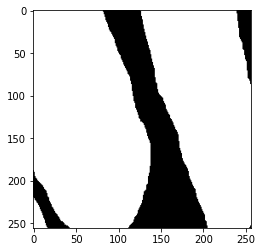

In [ ]:
plt.imshow(testm[116])


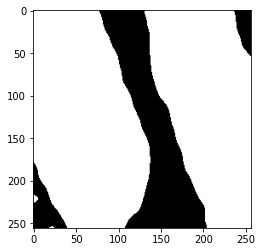

In [ ]:
plt.imshow(output[116])

In [ ]:
print(numpy.unique(output[54]))

[  0 255]


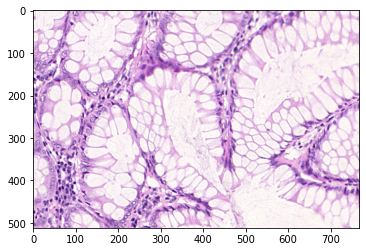

In [ ]:
plt.imshow(testin[0])

<Figure size 432x288 with 0 Axes>

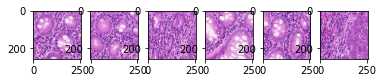

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=54

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(test[k+0])
axarr[1].imshow(test[k+1])
axarr[2].imshow(test[k+2])
axarr[3].imshow(test[k+3])
axarr[4].imshow(test[k+4])
axarr[5].imshow(test[k+5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

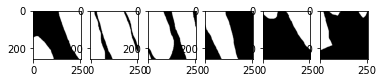

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=114

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(testm[k+0])
axarr[1].imshow(testm[k+1])
axarr[2].imshow(testm[k+2])
axarr[3].imshow(testm[k+3])
axarr[4].imshow(testm[k+4])
axarr[5].imshow(testm[k+5])

<Figure size 432x288 with 0 Axes>

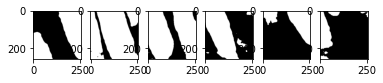

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=114
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(output[k+0])
axarr[1].imshow(output[k+1])
axarr[2].imshow(output[k+2])
axarr[3].imshow(output[k+3])
axarr[4].imshow(output[k+4])
axarr[5].imshow(output[k+5])

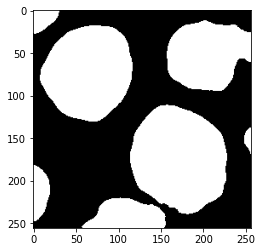

In [ ]:
plt.imshow(output[54])

In [ ]:
for i in range(59):
  print(numpy.unique(output[i]))

[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[255]
[  0 255]
[  0 255]
[255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
